In [1]:
#pip install datasets 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df["job_skills"]=df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_US=df[(df["job_title_short"]=="Data Analyst") & (df["job_country"] == "United States")].copy()
df_DA_US=df_DA_US.dropna(subset=["salary_year_avg"])
df_DA_US["salary_year_avg"].sample(10)

250934     67500.0
24148      65000.0
742523     86521.0
729918     60000.0
604850    109500.0
397133    110000.0
474828     60000.0
775516     80000.0
358274     92500.0
168214     90000.0
Name: salary_year_avg, dtype: float64

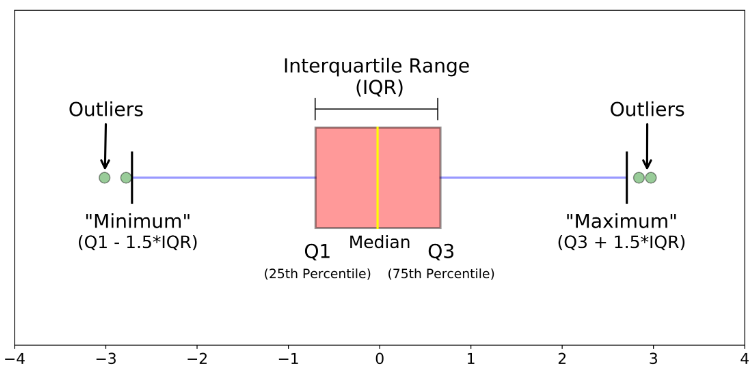

<Axes: >

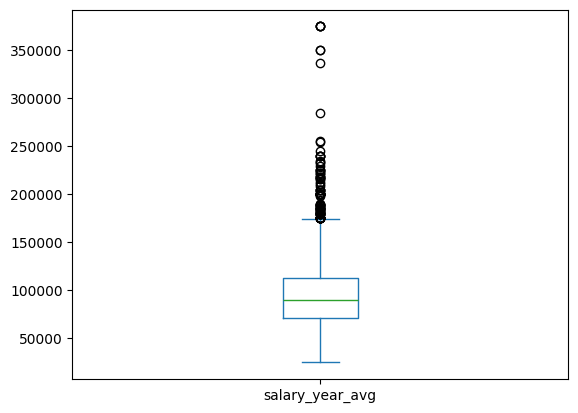

In [6]:
df_DA_US["salary_year_avg"].plot(kind="box")

C:\Users\Gamze kılınç\AppData\Local\Temp\ipykernel_4916\3731172716.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=job_titles ,vert=False)


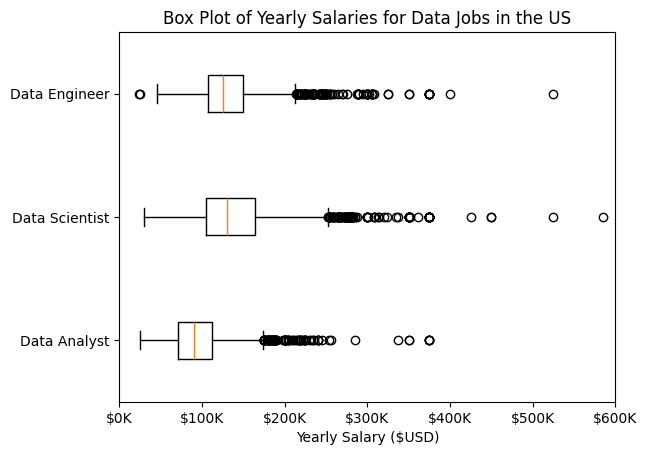

In [24]:
job_titles = ["Data Analyst", "Data Scientist", "Data Engineer"]
df_US=df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].copy()
df_US=df_US.dropna(subset=["salary_year_avg"])

job_list = [df_US[df_US["job_title_short"]==job_title]["salary_year_avg"] for job_title in job_titles]
plt.boxplot(job_list,labels=job_titles ,vert=False)

plt.title("Box Plot of Yearly Salaries for Data Jobs in the US")
plt.xlabel("Yearly Salary ($USD)")
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f"${int(x/1000)}K")) # Format x-axis as currency
plt.xlim(0, 600000) # Set x-axis limit
plt.show()

In [9]:
df_US["job_title_short"].value_counts()

job_title_short
Data Analyst      67816
Data Scientist    58830
Data Engineer     35080
Name: count, dtype: int64

In [13]:
df_US["salary_year_avg"]

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64